# Exploratory Data Analysis (EDA)

Objective:
Understand user behavior on an e-commerce platform by exploring event-level data.
This step validates data quality, user funnel structure, and overall suitability
for metric design and A/B testing.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


We load two months of event-level data (October and November 2019) and combine them
to improve metric stability and represent a realistic product usage window.


In [5]:
import pandas as pd
from pathlib import Path

BASE_PATH = Path("/Users/sabarish/Desktop/Project_1/eCommerce behavior")

# Load both months (limit rows so it doesn't crash)
oct_df = pd.read_csv(BASE_PATH / "2019-Oct.csv", nrows=500_000)
nov_df = pd.read_csv(BASE_PATH / "2019-Nov.csv", nrows=500_000)

# Combine them
events = pd.concat([oct_df, nov_df], ignore_index=True)

events.shape


(1000000, 9)

Each row represents a single user action on the platform.
We preview the data to understand available columns and values.


In [6]:
events.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [27]:
events.columns


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

Each row represents a single user action on the platform.
We preview the data to understand available columns and values.


In [7]:
events = events[
    [
        "event_time",
        "event_type",
        "product_id",
        "category_id",
        "category_code",
        "brand",
        "price",
        "user_id",
        "user_session"
    ]
]

events.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


Convert timestamps into datetime format and extract useful time features
for trend and activity analysis.


In [22]:
# 1. Convert time column
events["event_time"] = pd.to_datetime(events["event_time"])

# 2. Basic time features
events["date"] = events["event_time"].dt.date
events["hour"] = events["event_time"].dt.hour

# 3. Event distribution (funnel)
events["event_type"].value_counts()

# 4. Unique users
events["user_id"].nunique()

events["event_time"] = pd.to_datetime(events["event_time"])
events["date"] = events["event_time"].dt.date
events["hour"] = events["event_time"].dt.hour




In [8]:
event_counts = events["event_type"].value_counts()
event_counts


event_type
view        964475
purchase     19353
cart         16172
Name: count, dtype: int64

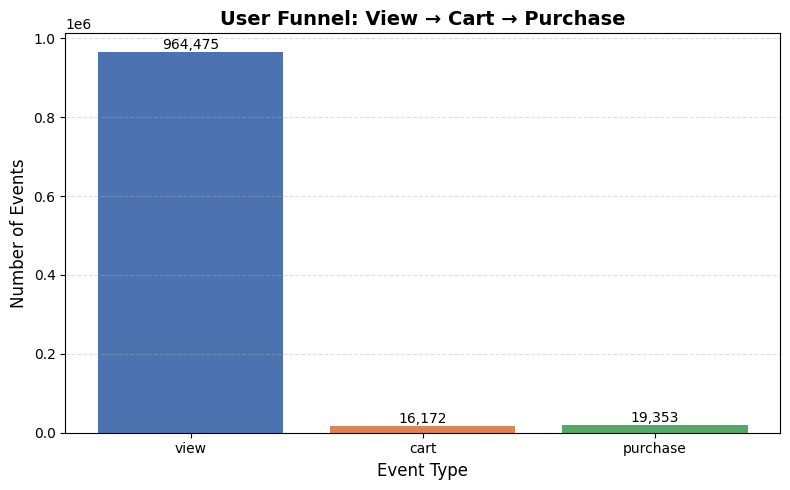

In [18]:
import matplotlib.pyplot as plt

# Order events logically
event_counts = event_counts.reindex(["view", "cart", "purchase"])

# Create better looking bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(
    event_counts.index,
    event_counts.values,
    color=["#4C72B0", "#DD8452", "#55A868"]
)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("User Funnel: View → Cart → Purchase", fontsize=14, weight="bold")
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


Measure the total number of unique users interacting with the platform.


In [10]:
events["user_id"].nunique()


177641

Analyze daily active users to ensure traffic stability and detect anomalies.


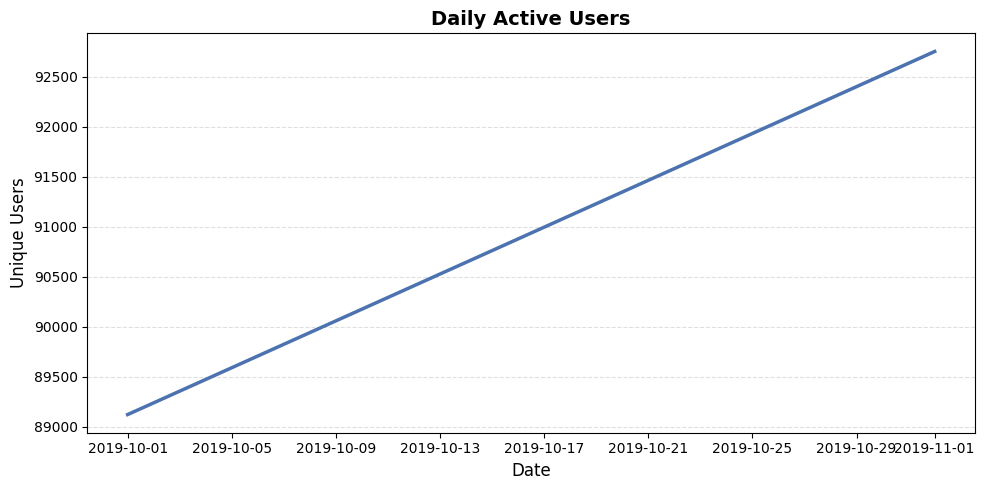

In [19]:
plt.figure(figsize=(10,5))

plt.plot(
    daily_users.index,
    daily_users.values,
    linewidth=2.5,
    color="#4C72B0"
)

plt.title("Daily Active Users", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unique Users", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Compute the number of unique users reaching each funnel stage.
This highlights where the largest drop-offs occur.


In [24]:
funnel_final = pd.DataFrame({
    "stage": ["view", "cart", "purchase"],
    "unique_users": [
        view_users,
        cart_users,
        purchase_users
    ]
})

funnel_final["conversion_from_view"] = (
    funnel_final["unique_users"] / view_users
)

funnel_final




,stage,unique_users,conversion_from_view
0,view,177621,1.000000
1,cart,8875,0.049966
2,purchase,14568,0.082017


### Funnel Summary

- ~5% of users who view a product add it to cart
- ~8.2% of users who view a product make a purchase
- Cart is an optional step; many users purchase directly

Therefore, view → purchase is treated as the primary conversion metric,
while cart is analyzed as a secondary engagement signal.


In [15]:
funnel["conversion_from_previous"] = (
    funnel["unique_users"] / funnel["unique_users"].shift(1)
)

funnel


,event_type,unique_users,conversion_from_previous
0,cart,8883,NaN
1,purchase,14584,1.641788
2,view,177621,12.179169


Inspect purchase prices to ensure values are reasonable and suitable
for revenue analysis.


In [16]:
events.loc[
    events["event_type"] == "purchase", "price"
].describe()


count    19353.000000
mean       310.710782
std        352.398962
min          0.790000
25%         84.870000
50%        177.440000
75%        385.340000
max       2574.040000
Name: price, dtype: float64

In [17]:
events.loc[
    events["event_type"] == "purchase", "price"
].describe()


count    19353.000000
mean       310.710782
std        352.398962
min          0.790000
25%         84.870000
50%        177.440000
75%        385.340000
max       2574.040000
Name: price, dtype: float64

## Key Takeaways from Exploration

- The dataset captures realistic, event-level user behavior on an e-commerce platform
- User journeys broadly follow a view → add-to-cart → purchase structure, with cart acting as an optional step
- A substantial drop-off occurs between product view and add-to-cart, indicating a key friction point in the funnel
- Daily active user trends remain stable across the observed period, suggesting consistent traffic and no major data anomalies
- Purchase prices exhibit a right-skewed distribution, which is typical for e-commerce data and shows no obvious quality issues

Overall, the dataset is clean, behaviorally sound, and well-suited for metric definition,
conversion analysis, and simulated A/B testing.
